In [69]:
import pandas as pd

data_series = pd.read_csv('Ind test 1.3 - RAW data task5_876435.csv')

In [70]:
data_series

,y
0,4
1,31
2,9
3,36
4,39
...,...
95,164
96,150
97,158
98,156


In [71]:
my_alpha = 0.21
data_series.index += 1
data_series

,y
1,4
2,31
3,9
4,36
5,39
...,...
96,164
97,150
98,158
99,156


1st method by custom function:

In [72]:
def exp_smoothing(series,alpha):
    result = [series[0]]
    for index in range(1, len(series)):
        result.append(alpha * series[index] + (1 - alpha) * result[index - 1])
    return result

In [73]:
data_series['y_exp_norm_custom'] = exp_smoothing(data_series['y'].tolist(), my_alpha)

In [74]:
data_series

,y,y_exp_norm_custom
1,4,4.000000
2,31,9.670000
3,9,9.529300
4,36,15.088147
5,39,20.109636
...,...,...
96,164,149.115301
97,150,149.301087
98,158,151.127859
99,156,152.151009


2nd method by pandas.ewm

In [0]:
data_series['y_exp_norm_ewm'] = data_series['y'].ewm(alpha=my_alpha, adjust=False).mean()

In [84]:
data_series

,y,y_exp_norm_custom,y_exp_norm_ewm
1,4,4.00000000000000000000,4.00000000000000000000
2,31,9.66999999999999992895,9.66999999999999815259
3,9,9.52930000000000099192,9.52929999999999921556
4,36,15.08814700000000108560,15.08814699999999930924
5,39,20.10963612999999838848,20.10963612999999838848
...,...,...,...
96,164,149.11530056530571641815,149.11530056530568799644
97,150,149.30108744659150943335,149.30108744659148101164
98,158,151.12785908280730495790,151.12785908280727653619
99,156,152.15100867541778484338,152.15100867541775642167


In [77]:
import matplotlib.pyplot as plt

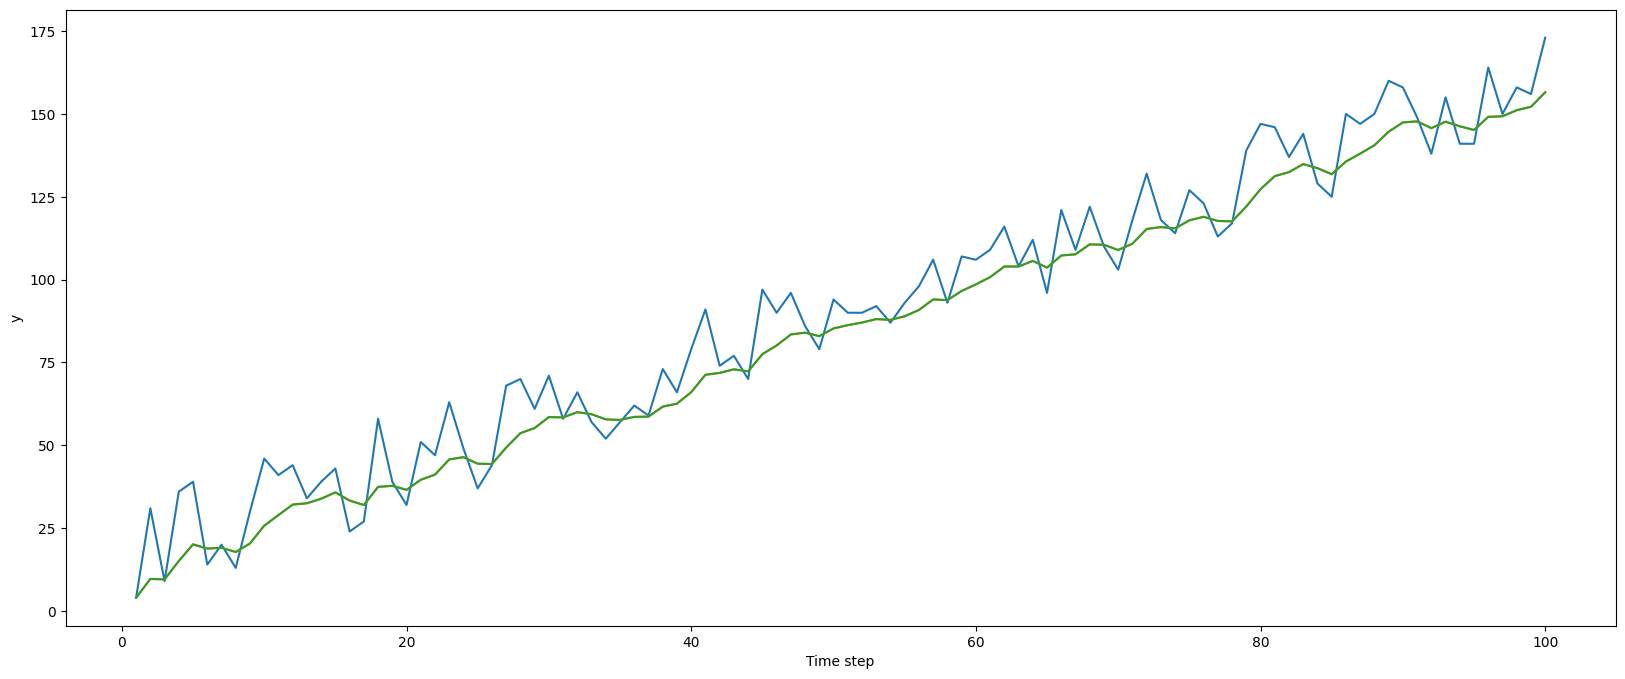

In [78]:
plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series)
plt.plot('y_exp_norm_custom', data = data_series)
plt.plot('y_exp_norm_ewm', data= data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

In [86]:
(data_series['y_exp_norm_custom'] == data_series['y_exp_norm_ewm']).unique()

array([ True, False])

In [0]:
# pd.set_option('display.float_format', '{:.20f}'.format)
# data_series

In [94]:
# pd.reset_option('display.float_format')

In [95]:
data_series.loc[[48]]

,y,y_exp_norm_custom,y_exp_norm_ewm
48,86,83.990765,83.990765


In [96]:
y48 = data_series['y_exp_norm_ewm'].loc[[100]]
round(y48,2)

100    156.53
Name: y_exp_norm_ewm, dtype: float64

Постройте линейный тренд для этого же исходного временного ряда Y
Определите, насколько хорошо линейный тренд аппроксимирует значения временного ряда.

In [98]:
import numpy as np
X = data_series.index.to_numpy()
Y = data_series['y'].to_numpy()
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [101]:
poly = np.polyfit(X,Y,1)
print(poly)

[ 1.45322532 16.11212121]


In [102]:
a = round(poly[0], 2)
b = round(poly[1], 2)

In [103]:
a,b

(1.45, 16.11)

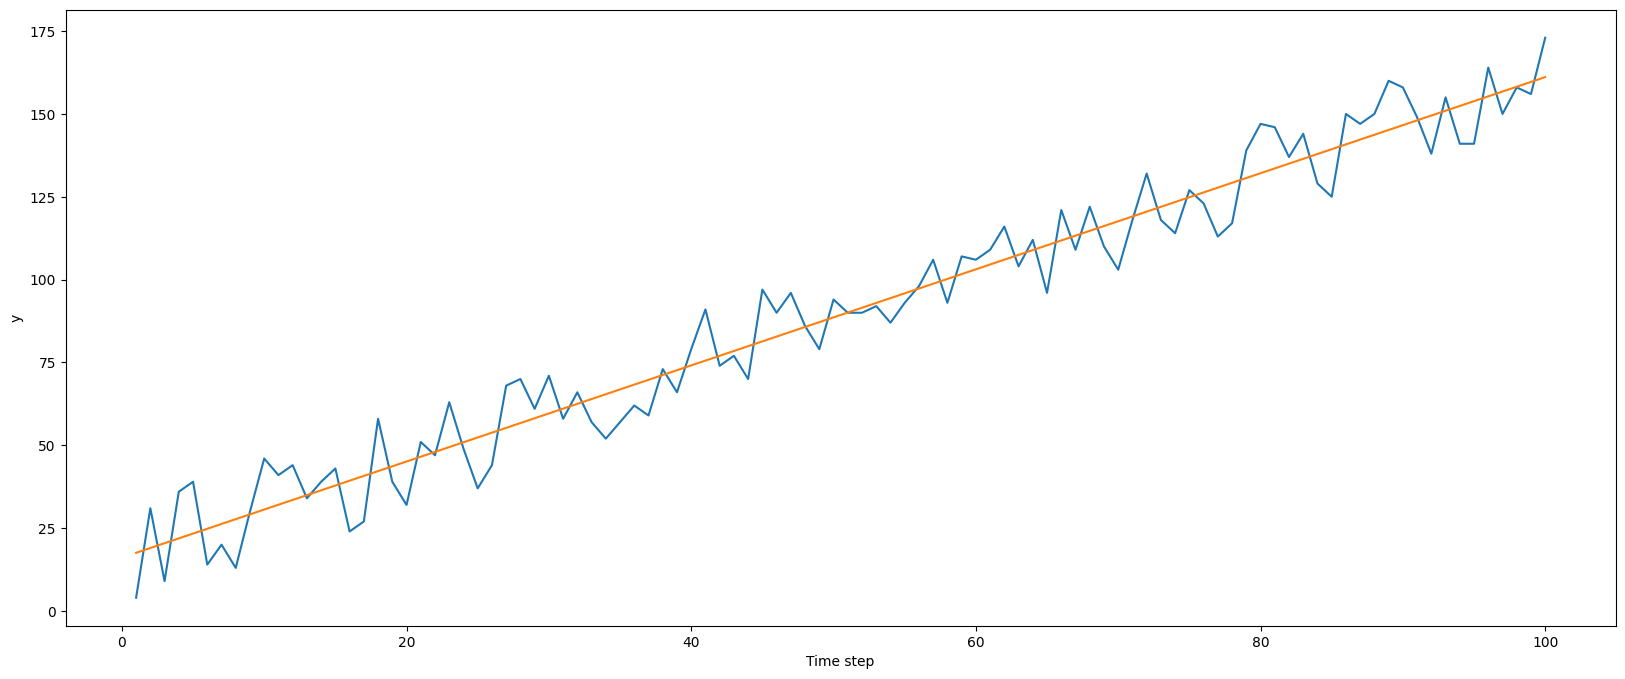

In [104]:
x = np.arange(1, 101)
data_series['lin_trend'] = a * x + b
plt.figure(figsize=(20, 8))
plt.plot('y', data=data_series)
plt.plot('lin_trend', data=data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

In [106]:
f_i = data_series['lin_trend']
y_avg = data_series['y'].mean()

In [107]:
R2 = 1 - ((Y - f_i) ** 2).sum() / ((Y - y_avg) ** 2).sum()

In [109]:
round(R2,2)

0.95

In [110]:
y_101 = a * 101 + b
round(y_101, 0)

163.0